# Modeling with Neural Network

There are many effective ways to make classification predictions, and a neural network was chosen for this task. 

Artificial Neural Networks and Deep Neural Networks are effective for high dimensionality problems, but they are also theoretically complex. Fortunately, there are deep learning frameworks, like TensorFlow, to simplify and streamline the process.

In [52]:
## Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from nltk.tokenize import RegexpTokenizer

from keras.preprocessing import sequence
from keras.models import load_model
from tensorflow import keras
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D



In [12]:
df = pd.read_csv('data/cleaned.csv')

In [13]:
df.head()

,rating,title,review,country,date
0,3,Pricy for it’s quality,Giving four stars because the inner layer is j...,Canada,2020-06-04
1,3,They fit small,"The fabric, elastic & overall quality is great...",Canada,2020-06-27
2,4,Needs filters that aren't included!,Most of the reason I ordered this is because I...,Canada,2020-06-11
3,4,fast delivery & comfortable,i recieved the wrong colour but it saves me fr...,Canada,2020-05-20
4,4,Comfortable with customizable adjustment,I bought 4 of these and will possibly purchase...,Canada,2020-06-23


In [14]:
df.drop(['country','date'], axis = 1, inplace=True) 

In [15]:
df.head()

,rating,title,review
0,3,Pricy for it’s quality,Giving four stars because the inner layer is j...
1,3,They fit small,"The fabric, elastic & overall quality is great..."
2,4,Needs filters that aren't included!,Most of the reason I ordered this is because I...
3,4,fast delivery & comfortable,i recieved the wrong colour but it saves me fr...
4,4,Comfortable with customizable adjustment,I bought 4 of these and will possibly purchase...


## One-Hot-Encoding

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. One hot encoding (or dummy encoding) allows the representation of categorical data by a process of “binarization” of the category and includes it as a feature to train the model. In this case, each sample's rating (between 1 and 5) is encoded as either '1' for that star rating, or '0' for every other rating.

In [16]:
score_encoding = pd.DataFrame(OneHotEncoder().fit_transform(df[['rating']]).toarray())

In [17]:
score_encoding

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
9290,0.0,1.0,0.0,0.0,0.0
9291,0.0,1.0,0.0,0.0,0.0
9292,0.0,1.0,0.0,0.0,0.0
9293,0.0,1.0,0.0,0.0,0.0


In [18]:
df = df.join(score_encoding)

In [19]:
df = df.rename(columns={0: "rating_1", 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})


In [20]:
df.head()

,rating,title,review,rating_1,rating_2,rating_3,rating_4,rating_5
0,3,Pricy for it’s quality,Giving four stars because the inner layer is j...,0.0,0.0,1.0,0.0,0.0
1,3,They fit small,"The fabric, elastic & overall quality is great...",0.0,0.0,1.0,0.0,0.0
2,4,Needs filters that aren't included!,Most of the reason I ordered this is because I...,0.0,0.0,0.0,1.0,0.0
3,4,fast delivery & comfortable,i recieved the wrong colour but it saves me fr...,0.0,0.0,0.0,1.0,0.0
4,4,Comfortable with customizable adjustment,I bought 4 of these and will possibly purchase...,0.0,0.0,0.0,1.0,0.0


## Train Test Split

Scikit-learn's train test split module is used to split the sample into random train and test subsets. Twenty percent of the data were used for testing.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df[['title','review']], 
                                                    df[['rating_1','rating_2','rating_3','rating_4','rating_5']], 
                                                    test_size=.2, 
                                                    random_state=42)

In [22]:
y_test.to_csv('data/y_test.csv', index=False)

In [23]:
x_train.head()

,title,review
7485,Ear straps way too big,Bought these for my kids to start school. I go...
8599,ok but fogs glasses,ok but fogs up glasses
2906,My favourite,"This mask is soft, comfortable and fits great...."
3994,Not what was on website,The package says XL but they are not the size ...
108,Good Mask and Nice fit,Found the mask to fit very comfortably and has...


## Cleaning Review with Tokenizer

The title and reviews are cleaned with NTLK's tokenizer. For each title or review, a lambda function is applied in which the text is split, tokenized with regex, changed to lower case, and finally joined together as a string.

In [24]:
x_train['c_review'] = x_train['review'].apply(
    lambda x: 
        ' '.join(
            [y for y in RegexpTokenizer(r'[a-zA-Z]+').tokenize(str(x).lower())]
        )
)

x_test['c_review'] = x_test['review'].apply(
    lambda x: 
        ' '.join(
            [y for y in RegexpTokenizer(r'[a-zA-Z]+').tokenize(str(x).lower())]
        )
)

In [25]:
x_train.head()

,title,review,c_review
7485,Ear straps way too big,Bought these for my kids to start school. I go...,bought these for my kids to start school i got...
8599,ok but fogs glasses,ok but fogs up glasses,ok but fogs up glasses
2906,My favourite,"This mask is soft, comfortable and fits great....",this mask is soft comfortable and fits great t...
3994,Not what was on website,The package says XL but they are not the size ...,the package says xl but they are not the size ...
108,Good Mask and Nice fit,Found the mask to fit very comfortably and has...,found the mask to fit very comfortably and has...


In [26]:
x_test

,title,review,c_review
7862,Not as Advertised,Not as advertised. Not cotton. No Filter Pocke...,not as advertised not cotton no filter pocket ...
1112,"Very nice, indiidually packaged",Very nice! Surprised to find them individually...,very nice surprised to find them individually ...
6909,Itchy Material and Impossible to Breathe Comfo...,I wish I had good things to say about this fac...,i wish i had good things to say about this fac...
4058,Nothing near XL in size,I ordered these in the XL size. They barely co...,i ordered these in the xl size they barely cov...
3733,Where’s the Beef???,These masks are made of the thinnest material....,these masks are made of the thinnest material ...
...,...,...,...
4004,Not for COVID!!!,"These masks are made of a thin knit material, ...",these masks are made of a thin knit material a...
4467,I won't buy them again,They don't seal to your face well. They don't ...,they don t seal to your face well they don t h...
6851,Child size,Cute cute cute masks. I bought the large and i...,cute cute cute masks i bought the large and it...
5048,good,"better than most mask, I have glasses so, I th...",better than most mask i have glasses so i thou...


## Differentiating Title From Review

The review title may have more or less weight compared to the reviews. Since they are separate entities, it is best to keep them separate for modeling.

We will use tokenize from the nltk package to turn the title into tokens, attach the "t_" prefix for each token, and finally join the tokens together back to a string.

In [27]:
test = df[:3].copy()
test['t_title'] = test['title'].apply(
    lambda x: 
        ' '.join(
            ['t_'+ y for y in RegexpTokenizer(r'[a-zA-Z]+').tokenize(str(x).lower())]
        )
)
test

,rating,title,review,rating_1,rating_2,rating_3,rating_4,rating_5,t_title
0,3,Pricy for it’s quality,Giving four stars because the inner layer is j...,0.0,0.0,1.0,0.0,0.0,t_pricy t_for t_it t_s t_quality
1,3,They fit small,"The fabric, elastic & overall quality is great...",0.0,0.0,1.0,0.0,0.0,t_they t_fit t_small
2,4,Needs filters that aren't included!,Most of the reason I ordered this is because I...,0.0,0.0,0.0,1.0,0.0,t_needs t_filters t_that t_aren t_t t_included


In [28]:
x_train['t_title'] = x_train['title'].apply(
    lambda x: 
        ' '.join(
            ['t_'+ y for y in RegexpTokenizer(r'[a-zA-Z]+').tokenize(str(x).lower())]
        )
)

x_test['t_title'] = x_test['title'].apply(
    lambda x: 
        ' '.join(
            ['t_'+ y for y in RegexpTokenizer(r'[a-zA-Z]+').tokenize(str(x).lower())]
        )
)

In [29]:
x_train.head()

,title,review,c_review,t_title
7485,Ear straps way too big,Bought these for my kids to start school. I go...,bought these for my kids to start school i got...,t_ear t_straps t_way t_too t_big
8599,ok but fogs glasses,ok but fogs up glasses,ok but fogs up glasses,t_ok t_but t_fogs t_glasses
2906,My favourite,"This mask is soft, comfortable and fits great....",this mask is soft comfortable and fits great t...,t_my t_favourite
3994,Not what was on website,The package says XL but they are not the size ...,the package says xl but they are not the size ...,t_not t_what t_was t_on t_website
108,Good Mask and Nice fit,Found the mask to fit very comfortably and has...,found the mask to fit very comfortably and has...,t_good t_mask t_and t_nice t_fit


## Create an Indexed Dictionary

Create an index for each unique word in a set combing both review and their titles for tracking in the neural network. Add 4 items to the beginning of the dictionary that represented padding, the start of the review, unknown words, and unused words.

In [30]:
r = ' '.join(x_train['c_review'].values).split()
t = ' '.join(x_train['t_title'].values).split()
t[:5]

['t_ear', 't_straps', 't_way', 't_too', 't_big']

In [31]:
d = {
    '<PAD>': 0,
    '<START>':1,
    '<UNK>':2,
    '<UNUSED>':3
}

# indexed review
i_dict = {**d,                                # add tag to dictionary
            **dict(zip             # zip keys (unique words) with values (numbered list)
                (dict(OrderedDict.fromkeys(r+t)), # ordered dictionary
                 list(range(4,len(t) + len (r) +4)         # list of range start from 4
                )),
)}




##  Convert Each Word into its Corresponding Index

Convert each word to the corresponding index in the dictionary made earlier. If the word is not in the dictionary, use <UNK> instead.

In [32]:
def indexWord(w):
    return [i_dict[x] if x in i_dict.keys() else i_dict['<UNK>'] for x in w.split() ]
# indexWord(x_train.iloc[1]['c_review'])
# indexWord('fogging while same app asdf')

In [33]:
x_train['i_review'] = x_train['c_review'].apply(indexWord)
x_test['i_review'] = x_test['c_review'].apply(indexWord)

x_train['i_title'] = x_train['t_title'].apply(indexWord)
x_test['i_title'] = x_test['t_title'].apply(indexWord)

In [34]:
x_train.head()

,title,review,c_review,t_title,i_review,i_title
7485,Ear straps way too big,Bought these for my kids to start school. I go...,bought these for my kids to start school i got...,t_ear t_straps t_way t_too t_big,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[8132, 8133, 8134, 8135, 8136]"
8599,ok but fogs glasses,ok but fogs up glasses,ok but fogs up glasses,t_ok t_but t_fogs t_glasses,"[35, 23, 36, 37, 38]","[8137, 8138, 8139, 8140]"
2906,My favourite,"This mask is soft, comfortable and fits great....",this mask is soft comfortable and fits great t...,t_my t_favourite,"[39, 20, 40, 41, 42, 30, 43, 44, 19, 45, 46, 4...","[8141, 8142]"
3994,Not what was on website,The package says XL but they are not the size ...,the package says xl but they are not the size ...,t_not t_what t_was t_on t_website,"[19, 75, 76, 77, 23, 78, 25, 79, 19, 80, 81, 8...","[8143, 8144, 8145, 8146, 8147]"
108,Good Mask and Nice fit,Found the mask to fit very comfortably and has...,found the mask to fit very comfortably and has...,t_good t_mask t_and t_nice t_fit,"[84, 19, 20, 9, 21, 85, 86, 30, 87, 88, 9, 89,...","[8148, 8149, 8150, 8151, 8152]"


In [35]:
x_test

,title,review,c_review,t_title,i_review,i_title
7862,Not as Advertised,Not as advertised. Not cotton. No Filter Pocke...,not as advertised not cotton no filter pocket ...,t_not t_as t_advertised,"[79, 95, 110, 79, 1347, 61, 94, 941, 808, 6, 1...","[8143, 8279, 8219]"
1112,"Very nice, indiidually packaged",Very nice! Surprised to find them individually...,very nice surprised to find them individually ...,t_very t_nice t_indiidually t_packaged,"[85, 48, 1732, 9, 473, 179, 1566, 662, 335, 40...","[8262, 8151, 2, 8673]"
6909,Itchy Material and Impossible to Breathe Comfo...,I wish I had good things to say about this fac...,i wish i had good things to say about this fac...,t_itchy t_material t_and t_impossible t_to t_b...,"[12, 940, 12, 291, 329, 1748, 9, 636, 181, 39,...","[9011, 8159, 8150, 10296, 8155, 8595, 8912]"
4058,Nothing near XL in size,I ordered these in the XL size. They barely co...,i ordered these in the xl size they barely cov...,t_nothing t_near t_xl t_in t_size,"[12, 332, 5, 151, 19, 77, 80, 78, 809, 157, 39...","[8999, 9683, 8243, 8231, 8222]"
3733,Where’s the Beef???,These masks are made of the thinnest material....,these masks are made of the thinnest material ...,t_where t_s t_the t_beef,"[5, 69, 25, 351, 52, 19, 2, 104, 933, 139, 14,...","[8298, 8286, 8253, 2]"
...,...,...,...,...,...,...
4004,Not for COVID!!!,"These masks are made of a thin knit material, ...",these masks are made of a thin knit material a...,t_not t_for t_covid,"[5, 69, 25, 351, 52, 14, 318, 2655, 104, 30, 4...","[8143, 8161, 8550]"
4467,I won't buy them again,They don't seal to your face well. They don't ...,they don t seal to your face well they don t h...,t_i t_won t_t t_buy t_them t_again,"[78, 258, 138, 1033, 9, 53, 152, 96, 78, 258, ...","[8178, 8488, 8260, 8175, 8180, 8337]"
6851,Child size,Cute cute cute masks. I bought the large and i...,cute cute cute masks i bought the large and it...,t_child t_size,"[162, 162, 162, 69, 12, 4, 19, 361, 30, 140, 4...","[9115, 8222]"
5048,good,"better than most mask, I have glasses so, I th...",better than most mask i have glasses so i thou...,t_good,"[56, 243, 344, 20, 12, 65, 38, 118, 12, 345, 1...",[8148]


## Combine Indexed Title and Reviews

Finally, we will combine the titles and reviews together so we can feed them into our NN model.

In [36]:
x_train['i_all'] = x_train['i_title'] + x_train['i_review']
x_test['i_all'] = x_test['i_title'] + x_test['i_review']
# x_train.head()

In [37]:
x_train

,title,review,c_review,t_title,i_review,i_title,i_all
7485,Ear straps way too big,Bought these for my kids to start school. I go...,bought these for my kids to start school i got...,t_ear t_straps t_way t_too t_big,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[8132, 8133, 8134, 8135, 8136]","[8132, 8133, 8134, 8135, 8136, 4, 5, 6, 7, 8, ..."
8599,ok but fogs glasses,ok but fogs up glasses,ok but fogs up glasses,t_ok t_but t_fogs t_glasses,"[35, 23, 36, 37, 38]","[8137, 8138, 8139, 8140]","[8137, 8138, 8139, 8140, 35, 23, 36, 37, 38]"
2906,My favourite,"This mask is soft, comfortable and fits great....",this mask is soft comfortable and fits great t...,t_my t_favourite,"[39, 20, 40, 41, 42, 30, 43, 44, 19, 45, 46, 4...","[8141, 8142]","[8141, 8142, 39, 20, 40, 41, 42, 30, 43, 44, 1..."
3994,Not what was on website,The package says XL but they are not the size ...,the package says xl but they are not the size ...,t_not t_what t_was t_on t_website,"[19, 75, 76, 77, 23, 78, 25, 79, 19, 80, 81, 8...","[8143, 8144, 8145, 8146, 8147]","[8143, 8144, 8145, 8146, 8147, 19, 75, 76, 77,..."
108,Good Mask and Nice fit,Found the mask to fit very comfortably and has...,found the mask to fit very comfortably and has...,t_good t_mask t_and t_nice t_fit,"[84, 19, 20, 9, 21, 85, 86, 30, 87, 88, 9, 89,...","[8148, 8149, 8150, 8151, 8152]","[8148, 8149, 8150, 8151, 8152, 84, 19, 20, 9, ..."
...,...,...,...,...,...,...,...
5734,Good & comfortable,Very soft.,very soft,t_good t_comfortable,"[85, 41]","[8148, 8215]","[8148, 8215, 85, 41]"
5191,Pretty decent mask.,They fit well and seem thick enough. Make sure...,they fit well and seem thick enough make sure ...,t_pretty t_decent t_mask,"[78, 21, 96, 30, 806, 1024, 601, 326, 195, 325...","[8859, 8688, 8149]","[8859, 8688, 8149, 78, 21, 96, 30, 806, 1024, ..."
5390,masques,"satisfaite du produit, masques respirable qui ...",satisfaite du produit masques respirable qui n...,t_masques,"[1488, 1096, 1758, 1219, 2784, 304, 1099, 4569...",[8514],"[8514, 1488, 1096, 1758, 1219, 2784, 304, 1099..."
860,A bit small.,"They seem well made, but to say they are ‘adul...",they seem well made but to say they are adult ...,t_a t_bit t_small,"[78, 806, 96, 351, 23, 9, 636, 78, 25, 113, 80...","[8162, 8552, 8177]","[8162, 8552, 8177, 78, 806, 96, 351, 23, 9, 63..."


## Padding

Before creating a neural network model, we will use keras' preprocessing module to pad the sequence. The value of the padding will be '<PAD>'. The padding will be applied after the sequence, if needed. The review's length will be capped to a maximum of 250 words.



In [38]:
x_test

,title,review,c_review,t_title,i_review,i_title,i_all
7862,Not as Advertised,Not as advertised. Not cotton. No Filter Pocke...,not as advertised not cotton no filter pocket ...,t_not t_as t_advertised,"[79, 95, 110, 79, 1347, 61, 94, 941, 808, 6, 1...","[8143, 8279, 8219]","[8143, 8279, 8219, 79, 95, 110, 79, 1347, 61, ..."
1112,"Very nice, indiidually packaged",Very nice! Surprised to find them individually...,very nice surprised to find them individually ...,t_very t_nice t_indiidually t_packaged,"[85, 48, 1732, 9, 473, 179, 1566, 662, 335, 40...","[8262, 8151, 2, 8673]","[8262, 8151, 2, 8673, 85, 48, 1732, 9, 473, 17..."
6909,Itchy Material and Impossible to Breathe Comfo...,I wish I had good things to say about this fac...,i wish i had good things to say about this fac...,t_itchy t_material t_and t_impossible t_to t_b...,"[12, 940, 12, 291, 329, 1748, 9, 636, 181, 39,...","[9011, 8159, 8150, 10296, 8155, 8595, 8912]","[9011, 8159, 8150, 10296, 8155, 8595, 8912, 12..."
4058,Nothing near XL in size,I ordered these in the XL size. They barely co...,i ordered these in the xl size they barely cov...,t_nothing t_near t_xl t_in t_size,"[12, 332, 5, 151, 19, 77, 80, 78, 809, 157, 39...","[8999, 9683, 8243, 8231, 8222]","[8999, 9683, 8243, 8231, 8222, 12, 332, 5, 151..."
3733,Where’s the Beef???,These masks are made of the thinnest material....,these masks are made of the thinnest material ...,t_where t_s t_the t_beef,"[5, 69, 25, 351, 52, 19, 2, 104, 933, 139, 14,...","[8298, 8286, 8253, 2]","[8298, 8286, 8253, 2, 5, 69, 25, 351, 52, 19, ..."
...,...,...,...,...,...,...,...
4004,Not for COVID!!!,"These masks are made of a thin knit material, ...",these masks are made of a thin knit material a...,t_not t_for t_covid,"[5, 69, 25, 351, 52, 14, 318, 2655, 104, 30, 4...","[8143, 8161, 8550]","[8143, 8161, 8550, 5, 69, 25, 351, 52, 14, 318..."
4467,I won't buy them again,They don't seal to your face well. They don't ...,they don t seal to your face well they don t h...,t_i t_won t_t t_buy t_them t_again,"[78, 258, 138, 1033, 9, 53, 152, 96, 78, 258, ...","[8178, 8488, 8260, 8175, 8180, 8337]","[8178, 8488, 8260, 8175, 8180, 8337, 78, 258, ..."
6851,Child size,Cute cute cute masks. I bought the large and i...,cute cute cute masks i bought the large and it...,t_child t_size,"[162, 162, 162, 69, 12, 4, 19, 361, 30, 140, 4...","[9115, 8222]","[9115, 8222, 162, 162, 162, 69, 12, 4, 19, 361..."
5048,good,"better than most mask, I have glasses so, I th...",better than most mask i have glasses so i thou...,t_good,"[56, 243, 344, 20, 12, 65, 38, 118, 12, 345, 1...",[8148],"[8148, 56, 243, 344, 20, 12, 65, 38, 118, 12, ..."


In [39]:
x_train = sequence.pad_sequences(x_train['i_all'],value=i_dict['<PAD>'], padding='post', maxlen=250)
x_test = sequence.pad_sequences(x_test['i_all'],value=i_dict['<PAD>'], padding='post', maxlen=250)


In [40]:
x_train

array([[8132, 8133, 8134, ...,    0,    0,    0],
       [8137, 8138, 8139, ...,    0,    0,    0],
       [8141, 8142,   39, ...,    0,    0,    0],
       ...,
       [8514, 1488, 1096, ...,    0,    0,    0],
       [8162, 8552, 8177, ...,    0,    0,    0],
       [8946, 8155, 8331, ...,    0,    0,    0]], dtype=int32)

In [41]:
np.save('data/x_test',x_test)

## Modeling

The neural network model consists of 1 embedding layer (with the number of embedding equal to the number of unique words), 1 dense layer with 16 nodes, and one output layer with 5 nodes for each rating outcome.

In [42]:
model = Sequential()
model.add(Embedding(len(i_dict),16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.2,random_state=42)

fitModel = model.fit(x_train,y_train,epochs=60,batch_size=250,validation_data=(x_val,y_val),verbose=0)

In [43]:
model.evaluate(x_val,y_val)

47/47 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.5685


[1.0454498529434204, 0.5685483813285828]

In [44]:
model.evaluate(x_test,y_test)

59/59 [==============================] - 0s 2ms/step - loss: 1.0251 - accuracy: 0.5923


[1.0250754356384277, 0.5922539234161377]

In [45]:
type(y_val)

pandas.core.frame.DataFrame

# Saving Models

In [46]:
model.save('data/model_nn.h5')

In [47]:
pickle.dump(i_dict,open('data/i_dict.pkl','wb'))

# Evaluation


The model achieved an accuracy of 0.568 on the validation set and 0.592 on the testing set.

In [48]:
model.evaluate(x_test, y_test)

59/59 [==============================] - 0s 2ms/step - loss: 1.0251 - accuracy: 0.5923


[1.0250754356384277, 0.5922539234161377]

# confusion matrix

A confusion matrix is created to visualize the results. Before doing so, one-hot-encoding has to be undone and convert the rating into a single number.

We observe that most mistakes were made one step apart to the correct score.

In [49]:
# undo one-hot-encoding
y_test['r'] = (y_test['rating_1']*1 \
            + y_test['rating_2']*2 \
            + y_test['rating_3']*3 \
            + y_test['rating_4']*4 \
            + y_test['rating_5']*5) - 1

y_predicted = np.argmax(model.predict(x_test) ,axis=1)

In [50]:
cm = confusion_matrix(y_test['r'], y_predicted)

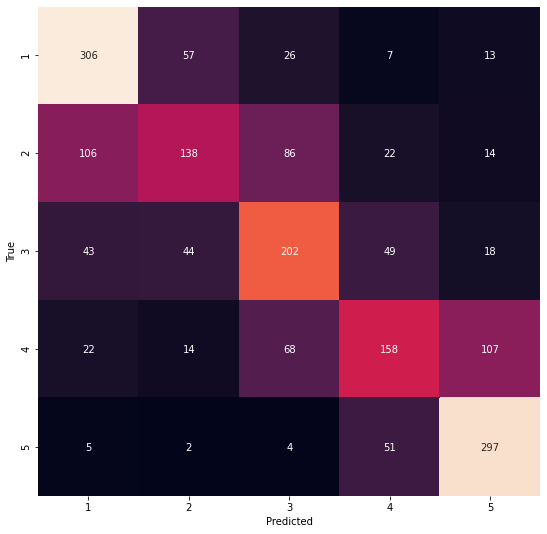

In [51]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(cm,
                 annot= True, 
                 fmt = '.4g', 
                 cbar=0,
                 xticklabels=[1,2,3,4,5],
                 yticklabels=[1,2,3,4,5])
ax.set(xlabel='Predicted', ylabel='True')
plt.show()